# Analiza vseh igralcev v zgodovini lige NBA

## Uvod

Moj cilj je narediti analizo podatkov vseh igralcev v zgodovini **ameriške košarkarske lige NBA** (National basketball association) s spletne strani https://www.basketball-reference.com. Predstaviti želim povprečnega igralca (njegovo višino, težo in dolžino kariere) in kako se je profil le-tega spreminjal skozi čas. Tu se mi zdi pomembno poudariti, da liga NBA obstaja od leta 1946, v naši bazi podatkov pa so tudi podatki o igralcih, ki so igrali v ligi ABA (American basketball association). Te ligi sta se združili leta 1976.

Nato bom predstavil profil igralca, ki igra na določeni igralni poziciji v ekipi in z analizo podatkov potrdil oziroma zavrnil naslednje hipoteze:
* centri so v povprečju najvišji in najtežji
* branilci so v povprečju najnižji in najlažji
* krila so nekje vmes

Tu bi bilo dobro omeniti, da pri košarki igra v eni ekipi 5 igralcev, vsak ime svojo osnovno pozicijo. Običajna delitev bi bila:
* 1...organizator igre
* 2...branilec
* 3...krilo
* 4...krilni center
* 5...center

v naših podatkih pa se uporablja delitev:
* G (guard)...sem spadajo 1ke in 2ke iz običajne delitve
* F (forward)...sem spadajo 3ke in 4ke
* C (centre)...sem spadajo 5ke

Nekateri igralci lahko igrajo več pozicij, sploh v sodobni košarki, vzeli bomo le preferirano.

Pogledali bomo tudi število aktivnih igralcev skozi čas, ki bi moralo rasti nekako tako, kot je rastlo število ekip v ligi;
* 1961...9 ekip
* 1966...10 ekip
* 1967...12 ekip
* 1968...14 ekip
* 1970...17 ekip
* 1974...18 ekip
* 1976...22 ekip
* 1980...23 ekip
* 1988...25 ekip
* 1989...27 ekip
* 1995...29 ekip
* 2004...30 ekip

Pogledali si bomo tudi verjetnost, da se igralec uvrsti v **Hall of fame**, ki je zbirka najuspešnejših košarkarjev vseh časov in je dober pokazatelj, da je imel posameznik res izvrstno košarkarsko kariero. Pogledali bomo kako na to verjetnost vplivajo razni dejavniki, kot so obdobje, v katerem je igral, dolžina kariere, pozicija, višina itd.

Vmes bomo poleg povprečij kdaj kot zanimivost pogledali tudi ekstreme, kot sta recimo najvišji in najnižji igralec.

Opomba: ne bom se spuščal v podrobnosti o košarki, njenih pravilih in razvoju igre skozi čas, saj je cilj projektne naloge analiza podatkov, ne predstavitev košarke. V kolikor so v razlagi uporabljene trditve ali podatki, ki niso iz tabel, sem uporabil svoje obsežno znanje o košarki.

In [2]:
import pandas as pd
podatki = pd.read_csv("igralci.csv")
podatki

,ime,zacetek_kariere,konec_kariere/sedanjost,dolzina_kariere,pozicija,visina,teza,leto_rojstva,v_hall_of_fame,trenutno_v_ligi
0,Alaa Abdelnaby,1991,1995,4,F,208,109.0,1968.0,ne,ne
1,Zaid Abdul-Aziz,1969,1978,9,C,206,107.0,1946.0,ne,ne
2,Kareem Abdul-Jabbar,1970,1989,19,C,218,102.0,1947.0,da,ne
3,Mahmoud Abdul-Rauf,1991,2001,10,G,185,74.0,1969.0,ne,ne
4,Tariq Abdul-Wahad,1998,2003,5,F,198,101.0,1974.0,ne,ne
...,...,...,...,...,...,...,...,...,...,...
5103,Ante Žižić,2018,2020,2,F,208,121.0,1997.0,ne,ne
5104,Jim Zoet,1983,1983,0,C,216,109.0,1953.0,ne,ne
5105,Bill Zopf,1971,1971,0,G,185,77.0,1948.0,ne,ne
5106,Ivica Zubac,2017,2023,6,C,213,109.0,1997.0,ne,da


Za vsakega igralca imamo torej njegovo ime in priimek, oziroma naziv, ki ga uporablja, pozicijo, ki jo igra, njegovo višino v centimetrih, težo v kilogramih, dolžino kariere v letih, pri igralcih, kjer je nič to pomeni, da niso odigrali cele sezone, kar so lahko razne 10-dnevne pogodbe in podobno. Pri začetku in koncu kariere ter pri letu rojstva sem vzel le letnico, saj se kariera gleda v sezonah, ki se za vse igralce začnejo ob istem času in končajo ob istem času, pred prihodom v ligo pa so v šoli ali pa v drugih košarkarskih ligah, kjer deluje podoben princip. Na koncu pa imamo še podatka ali je igralec v Hall of fame in ali je trenutno aktiven v NBA.

## Povprečen igralec

Poglejmo si najprej profil povprečnega igralca

In [57]:
int(podatki['visina'].mean())

198

In [11]:
int(podatki['teza'].mean())

95

In [13]:
int(podatki['dolzina_kariere'].mean())

4

Povprečen igralec je torej visok 198cm, tehta 95kg in igra v ligi 4 leta. Za primerjavo vzamemo povprečnega moškega, ki je visok 175cm in potrdimo splošno prepričanje, da so košarkarji nadpovprečno visoki ljudje. Vseeno pa obstajajo izjeme, kot je Muggsy Bogues, ki je kljub svojim nizkim 160 centimetrov uspel igrati 13 sezon in je imel nadvse uspešno kariero.

In [17]:
podatki.sort_values('visina', ascending=False)

,ime,zacetek_kariere,konec_kariere/sedanjost,dolzina_kariere,pozicija,visina,teza,leto_rojstva,v_hall_of_fame,trenutno_v_ligi
3228,Gheorghe Mureșan,1994,2000,6,C,231,138.0,1971.0,ne,ne
410,Manute Bol,1986,1995,9,C,231,91.0,1962.0,ne,ne
483,Shawn Bradley,1994,2005,11,C,229,107.0,1972.0,ne,ne
3113,Yao Ming,2003,2011,8,C,229,141.0,1980.0,da,ne
1347,Tacko Fall,2020,2022,2,C,229,141.0,1995.0,ne,ne
...,...,...,...,...,...,...,...,...,...,...
4779,Spud Webb,1986,1998,12,G,168,60.0,1963.0,ne,ne
2001,Mel Hirsch,1947,1947,0,G,168,75.0,1921.0,ne,ne
466,Earl Boykins,1999,2012,13,G,165,61.0,1976.0,ne,ne
1239,Penny Early,1969,1969,0,G,160,52.0,1943.0,ne,ne


<Axes: xlabel='visinski_razred'>

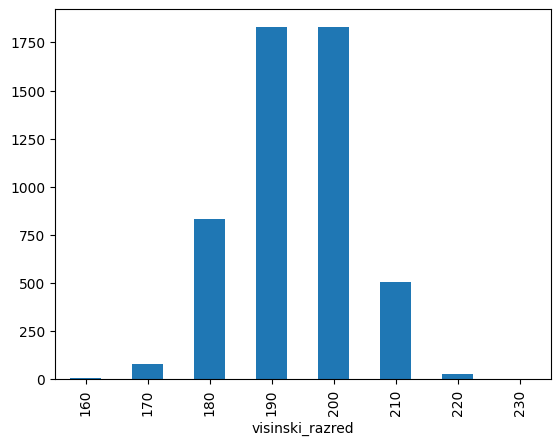

In [46]:
import matplotlib.pyplot as plt
podatki['visinski_razred'] = (podatki[['visina']] // 10) * 10
visinski_razredi = podatki.groupby(['visinski_razred']).count()
visinski_razredi['ime'].plot.bar()

<Axes: xlabel='teznostni_razred'>

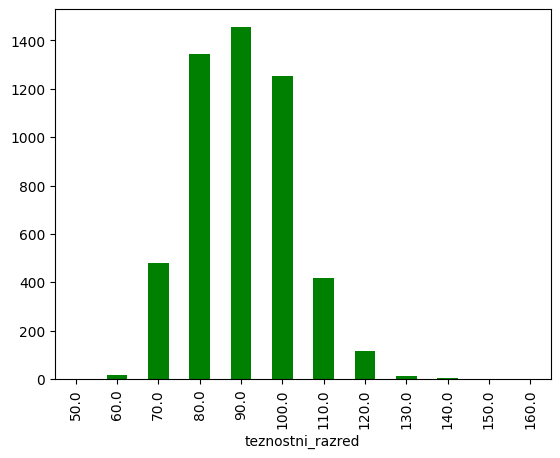

In [54]:
podatki['teznostni_razred'] = (podatki[['teza']] // 10) * 10
teznostni_razredi = podatki.groupby(['teznostni_razred']).count()
teznostni_razredi['ime'].plot.bar(color = 'Green')

<Axes: xlabel='dolzina_kariere'>

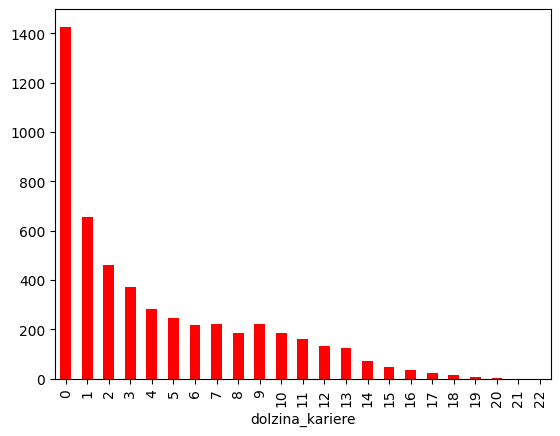

In [56]:
dolzina = podatki.groupby(['dolzina_kariere']).count()
dolzina['ime'].plot.bar(color = 'Red')

Ko pa pogledamo porazdelitev za vse igralce, pa ugotovimo, da sta višina in teža porazdeljeni normalno, večina igralcev pa v ligi NBA ne zdrži dlje kot 4 sezone.

Za lažjo analizo podatkov skozi čas bomo za vsakega igralca vzeli sredino njegove kariere, saj so nekateri igralci igrali v več desetletjih, Vince Carter recimo celo v štirih. Večina pa doseže vrhunec svoje kariere nekje na sredini, tako da je ta olajšava smiselna. 

In [17]:
Vince = podatki[podatki['ime'] == 'Vince Carter']
Vince

,ime,zacetek_kariere,konec_kariere/sedanjost,dolzina_kariere,pozicija,visina,teza,leto_rojstva,v_hall_of_fame,trenutno_v_ligi,desetletje
733,Vince Carter,1999,2020,21,G,198,100.0,1977.0,ne,ne,2000


<Axes: xlabel='desetletje'>

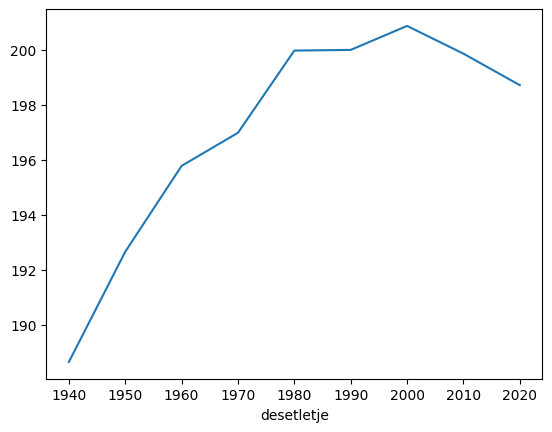

In [52]:
podatki['desetletje'] = ((podatki['konec_kariere/sedanjost'] + podatki['zacetek_kariere']) // 20) * 10 
podatki['desetletje']
podatki.groupby(['desetletje'])['visina'].mean().plot()

<Axes: xlabel='desetletje'>

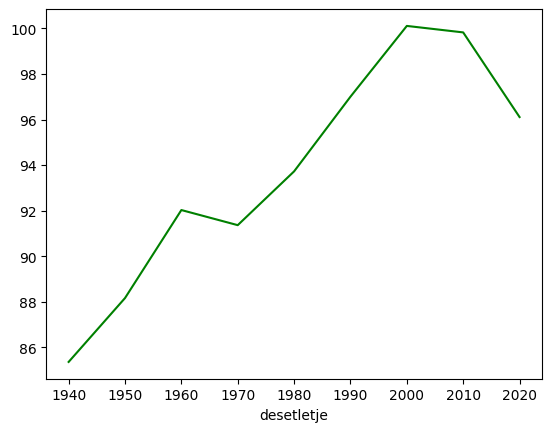

In [53]:
podatki.groupby(['desetletje'])['teza'].mean().plot(color = 'Green')

Vidimo, da se je povprečna višina do začetka 21. stoletja dvigovala, potem pa se je zaradi razvoja košarke začela nižati. Podobno se pokaže v povprečni teži, ki je seveda sorazmerna z višino.

<Axes: xlabel='desetletje'>

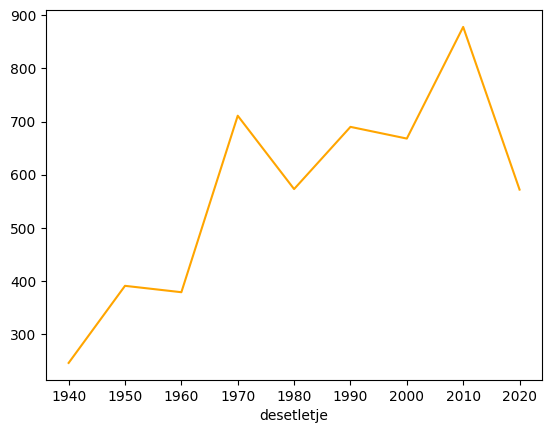

In [14]:
stevilo_aktivnih_igralcev = podatki.groupby(['desetletje']).count()
stevilo_aktivnih_igralcev['ime'].plot(color = 'Orange')

Potrdimo lahko hipotezo, da je z rastjo števila ekip, rastlo tudi število aktivnih igralcev. Izjema je trenutno desetletje, saj smo šele v četrtem letu.

## Pozicije

Najprej si poglejmo ali predstavljajo centri le eno petino vseh igralcev, branilci in krila pa vsak po dve petini, kot bi lahko sklepali iz v uvodu razložene delitve pozicij.

In [25]:
pozicije = podatki.groupby(['pozicija']).count()
pozicije['ime']

pozicija
C     769
F    2098
G    2241
Name: ime, dtype: int64

<Axes: ylabel='ime'>

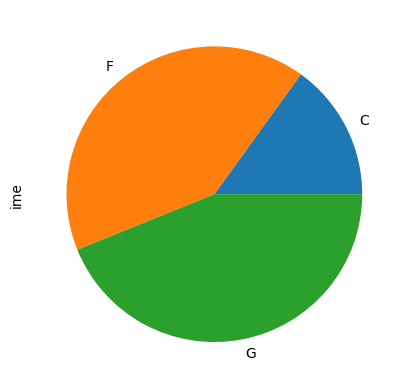

In [21]:
pozicije['ime'].plot.pie()

In [33]:
povprecna_visina_pozicije = podatki.groupby(['pozicija'])
pvp = povprecna_visina_pozicije.mean(['visina'])['visina']
pvp.astype(int)

pozicija
C    209
F    201
G    190
Name: visina, dtype: int32

Opazimo, da je centrov celo manj kot petino, razlog za to pa najdemo v povprečni višini glede na igralno pozicijo. Kot nam veleva logika, je to povsem smiselno, saj je tako visokih ljudi, ki so hkrati atletsko sposobni, na celem svetu zelo malo.

Po vzorcu prejšnjega poglavja lahko predvidevamo, da bodo centri v povprečju najtežji, branilci pa najlažji. Preverimo.

In [36]:
povprecna_visina_pozicije = podatki.groupby(['pozicija'])
ptp = povprecna_visina_pozicije.mean(['teza'])['teza']
ptp.astype(int)

pozicija
C    109
F     99
G     86
Name: teza, dtype: int32

Izkaže se, da smo pravilno predvidevali. Potrdili smo torej hipoteze o profilu igralca, glede na pozicijo, ki sem jih postavil v uvodu.

## Hall of fame

In [54]:
hof = podatki.groupby('v_hall_of_fame')
hof['ime'].count()

v_hall_of_fame
da     164
ne    4944
Name: ime, dtype: int64

Tu je treba poudariti, da aktivni igralci ne morajo biti v Hall of fame-u. To bo pomembno pri izračunu verjetnosti, da se igralec uvrsti tja.

In [55]:
aktivni = podatki.groupby('trenutno_v_ligi')
aktivni['ime'].count()

trenutno_v_ligi
da     690
ne    4418
Name: ime, dtype: int64

Izračunamo iskano verjetnost, ki je

In [56]:
164 / (5108 - 690)

0.03712086917157085

Torej manj kot 4 odstotke vseh NBA igralcev je imelo dovolj dobro kariero, da se uvrsti v Hall of fame. Ta dosežek je torej res izjemen.

Poglejmo si sedaj še dejavnike, ki bi lahko vplivali na možnosti igralca, da mu uspe dobiti eno največjih priznanj v svetu košarke.

In [57]:
v_hof = podatki[podatki['v_hall_of_fame'] == 'da']
v_hof

,ime,zacetek_kariere,konec_kariere/sedanjost,dolzina_kariere,pozicija,visina,teza,leto_rojstva,v_hall_of_fame,trenutno_v_ligi,desetletje
2,Kareem Abdul-Jabbar,1970,1989,19,C,218,102.0,1947.0,da,ne,1970
27,Rick Adelman,1969,1975,6,G,185,79.0,1946.0,da,ne,1970
69,Ray Allen,1997,2014,17,G,196,93.0,1975.0,da,ne,2000
130,Tiny Archibald,1971,1984,13,G,185,68.0,1948.0,da,ne,1970
135,Paul Arizin,1951,1962,11,F,193,86.0,1928.0,da,ne,1950
...,...,...,...,...,...,...,...,...,...,...,...
4871,Lenny Wilkens,1961,1975,14,G,185,82.0,1937.0,da,ne,1960
4873,Jamaal Wilkes,1975,1986,11,F,198,86.0,1953.0,da,ne,1980
4876,Dominique Wilkins,1983,1999,16,F,203,98.0,1960.0,da,ne,1990
5042,James Worthy,1983,1994,11,F,206,102.0,1961.0,da,ne,1980


In [58]:
int(v_hof['visina'].mean())

198

In [59]:
int(v_hof['teza'].mean())

94

Povprečna višina in teža ne pokažeta bistvenega odstopanja od baze vseh igralcev.

In [60]:
int(v_hof['dolzina_kariere'].mean())

11

Razlika pa se pokaže v povprečni dolžini kariere, saj je le-ta skoraj trikrat daljša kot od povprečnega igralca. To je seveda smiselno, saj bo uspešen košarkar ostal aktiven dlje, saj bo dobil boljše pogodbe za igranje (oziroma sploh dobil katerokoli pogodbo) in se mu bo to bolj izplačalo, kot kariero zaključiti ali pa odditi igrati v manj kvalitetne košarkarske lige. Navsezadnje je liga NBA najboljša košarkarska liga na svetu in so tam tudi plače daleč največje.

In [62]:
pozicije2 = v_hof.groupby(['pozicija']).count()
pozicije2['ime']

pozicija
C    36
F    63
G    65
Name: ime, dtype: int64

<Axes: ylabel='ime'>

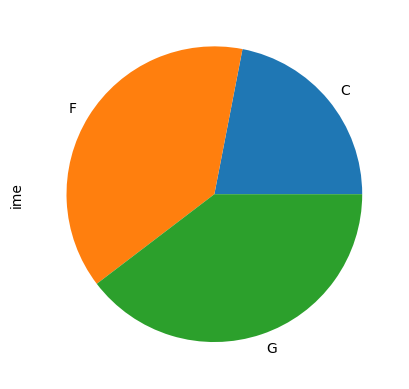

In [63]:
pozicije2['ime'].plot.pie()

Izkaže se, da centri predstavljajo večji del Halloffamerjev kot povprečnih igralcev, saj jih je tu več kot petino, med vsemi pa manj kot šestino. To bi si lahko razlagali s tem, da so tisti, ki jim uspe priti v ligo NBA in v njej ostanejo dovolj časa brez poškodb, zaradi svoje višine bolj dominantni, v primerjavi z ostalimi nižjimi igralci, in lažje dosežejo pogoje za vstop v Hall of fame.

<Axes: xlabel='desetletje'>

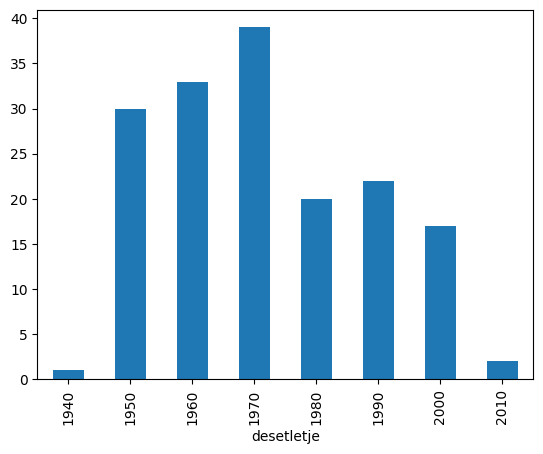

In [65]:
obdobje = v_hof.groupby(['desetletje']).count()
obdobje['ime'].plot.bar()

Kot pokaže graf, je največ halloffamerjev iz obdobja med 1950 in 1980. Iz tega bi lahko poimenovali tisto obdobje "Zlati časi košarke", ali pa to pomeni, da je bila liga takrat najbolj izenačena in je imelo največ ekip možnost zmage in s tem največ igralcev možnost doseči izjemne uspehe. Druge razlage bi bile še dominanca igralcev kot so Larry Bird, Magic Johnson, Michael Jordan, Kobe Bryant itd. v kasnejših obdobjih. Lahko bi bil razlog bolj strog kriterij za vstop v Hall of fame. Lahko pa bi bil razlog tudi kaj drugega. Odgovor na to vprašanje pa prepustim bralcu.

## Zaključek

Analiza je potrdila moje hipoteze iz uvoda, kar sem seveda tudi želel, saj mi to potrdi moje dobro poznavanje košarki in predvsem lige NBA. Upam, da sem nepoznavalcu košarke, ki je morebiti zašel v branje te analize, predstavil, približno kakšen izgleda povprečen igralec košarke in kaj potrebuje, da bo njegova kariera res izjemna, zraven pa je dobil še kakšno dejstvo o košarki na splošno.